In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize, curve_fit
import astropy.units as u
import astropy.constants as const
import math
import statistics
import matplotlib.patches as mpatches
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.cm
import scipy.signal as signal
from scipy.stats import pearsonr
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.colors import (ListedColormap, LinearSegmentedColormap)

# Parte 1

In [48]:
err_balanza = 0.005 * u.g # g
err_frecuencia = 0.0005 # KHz
err_largo = 0.05 * u.cm # cm

In [8]:
masa_cuerda = (2.22 * u.g).to(u.kg) # kg
largo_cuerda = (135.7 * u.cm).to(u.m) # m

densidad_lineal = masa_cuerda / largo_cuerda
densidad_lineal

<Quantity 0.00163596 kg / m>

$$f_{n} = \omega_{n}/2\pi = \frac{n}{2L}v$$

$$v = \sqrt{\frac{T}{\mu}}$$

$$\rightarrow \hspace{3mm} f_{n}(T) = \frac{n}{2L}\sqrt{\frac{T}{\mu}}$$

$$f_{T}(n) = \frac{n}{2L}v$$

In [9]:
primer_peso = 28.28 * u.g # g
n_1_pp = 0.008 # KHz
n_2_pp = 0.015 # KHz
n_3_pp = 0.022 # KHz

segundo_peso = 40.46 * u.g # g
n_1_sp = 0.008 # KHz
n_2_sp = 0.016 # KHz
n_3_sp = 0.026 # KHz

tercer_peso = 52.20 * u.g # g
n_1_tp = 0.010 # KHz
n_2_tp = 0.018 # KHz
n_3_tp = 0.029 # KHz

cuarto_peso = 64.56 * u.g # g
n_1_tp = 0.011 # KHz
n_2_tp = 0.022 # KHz
n_3_tp = 0.031 # KHz

quinto_peso = 78.27 * u.g # g
n_1_tp = 0.012 # KHz
n_2_tp = 0.022 # KHz
n_3_tp = 0.033 # KHz


In [10]:
lista_pesos_g = [primer_peso, segundo_peso, tercer_peso, cuarto_peso, quinto_peso]
lista_tensiones = [(peso.to(u.kg) * const.g0).value for peso in lista_pesos_g]

datos_transversal_t1 = pd.DataFrame()
datos_transversal_t1['n'] = [1, 2, 3]
datos_transversal_t1['frecuencia (KHz)'] = [0.008, 0.015, 0.022]
datos_transversal_t1['err_frec'] = [err_frecuencia for i in range(3)]

datos_transversal_t2 = pd.DataFrame()
datos_transversal_t2['n'] = [1, 2, 3]
datos_transversal_t2['frecuencia (KHz)'] = [0.008, 0.016, 0.026]
datos_transversal_t2['err_frec'] = [err_frecuencia for i in range(3)]

datos_transversal_t3 = pd.DataFrame()
datos_transversal_t3['n'] = [1, 2, 3]
datos_transversal_t3['frecuencia (KHz)'] = [0.010, 0.018, 0.029]
datos_transversal_t3['err_frec'] = [err_frecuencia for i in range(3)]

datos_transversal_t4 = pd.DataFrame()
datos_transversal_t4['n'] = [1, 2, 3]
datos_transversal_t4['frecuencia (KHz)'] = [0.011, 0.022, 0.031]
datos_transversal_t4['err_frec'] = [err_frecuencia for i in range(3)]

datos_transversal_t5 = pd.DataFrame()
datos_transversal_t5['n'] = [1, 2, 3]
datos_transversal_t5['frecuencia (KHz)'] = [0.012, 0.022, 0.033]
datos_transversal_t5['err_frec'] = [err_frecuencia for i in range(3)]

In [11]:
def velocidad_onda(n_2l, v):
    return n_2l * v

In [36]:
popt_vt1, pcov_vt1 = curve_fit(velocidad_onda, datos_transversal_t1['n'] / (2 * largo_cuerda), datos_transversal_t1['frecuencia (KHz)'] * 1000, sigma=datos_transversal_t1['err_frec'] * 1000)

popt_vt2, pcov_vt2 = curve_fit(velocidad_onda, datos_transversal_t2['n'] / (2 * largo_cuerda), datos_transversal_t2['frecuencia (KHz)'] * 1000, sigma=datos_transversal_t2['err_frec'] * 1000)

popt_vt3, pcov_vt3 = curve_fit(velocidad_onda, datos_transversal_t3['n'] / (2 * largo_cuerda), datos_transversal_t3['frecuencia (KHz)'] * 1000, sigma=datos_transversal_t3['err_frec'] * 1000)

popt_vt4, pcov_vt4 = curve_fit(velocidad_onda, datos_transversal_t4['n'] / (2 * largo_cuerda), datos_transversal_t4['frecuencia (KHz)'] * 1000, sigma=datos_transversal_t4['err_frec'] * 1000)

popt_vt5, pcov_vt5 = curve_fit(velocidad_onda, datos_transversal_t5['n'] / (2 * largo_cuerda), datos_transversal_t5['frecuencia (KHz)'] * 1000, sigma=datos_transversal_t5['err_frec'] * 1000)

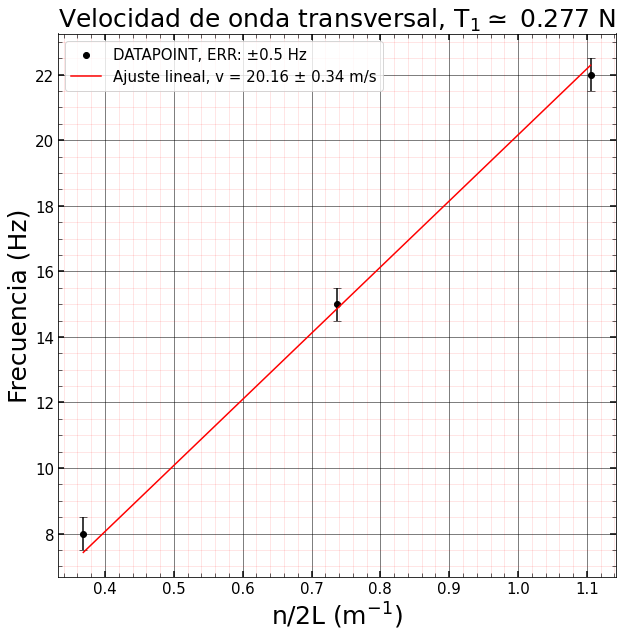

In [77]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(datos_transversal_t1['n'] / (2 * largo_cuerda), datos_transversal_t1['frecuencia (KHz)'] * 1000, c='black', label='DATAPOINT, ERR: ±{} Hz'.format(datos_transversal_t1['err_frec'][0] * 1000))
ax.errorbar(datos_transversal_t1['n'] / (2 * largo_cuerda), datos_transversal_t1['frecuencia (KHz)'] * 1000, yerr = datos_transversal_t1['err_frec'] * 1000, fmt = '.', markersize = '1', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6 )
ax.plot(datos_transversal_t1['n'] / (2 * largo_cuerda), velocidad_onda(datos_transversal_t1['n'] / (2 * largo_cuerda), popt_vt1[0]), c='red', label='Ajuste lineal, v = {} ± {} m/s'.format(round(popt_vt1[0], 2), round(np.sqrt(pcov_vt1[0][0]), 2)))

ax.set_title(r'Velocidad de onda transversal, T$_1 \simeq$ {} N'.format(round(lista_tensiones[0], 3)), fontsize=25)
ax.set_ylabel(r'Frecuencia (Hz)', fontsize=25)
ax.set_xlabel(r'n/2L (m$^{-1}$)', fontsize=25)

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
              grid_linewidth=0.5)

ax.xaxis.set_minor_locator(MultipleLocator(0.02))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')
ax.grid(True, which='both')
ax.legend(fontsize=15)

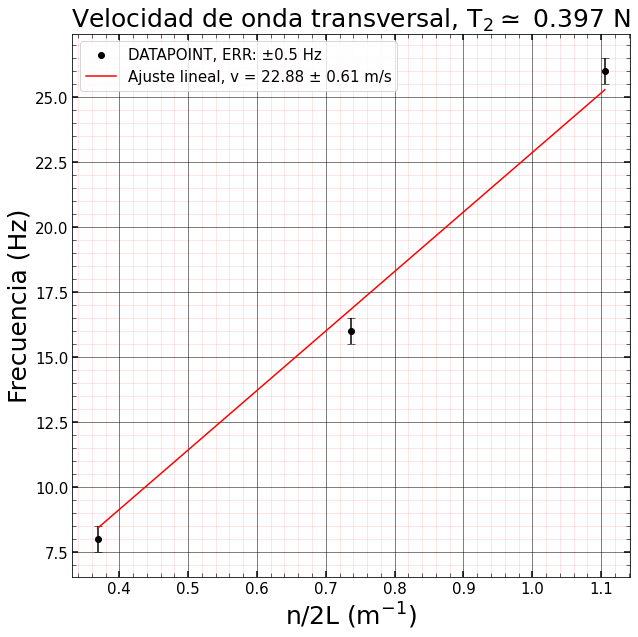

In [78]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(datos_transversal_t2['n'] / (2 * largo_cuerda), datos_transversal_t2['frecuencia (KHz)'] * 1000, c='black', label='DATAPOINT, ERR: ±{} Hz'.format(datos_transversal_t2['err_frec'][0] * 1000))
ax.errorbar(datos_transversal_t2['n'] / (2 * largo_cuerda), datos_transversal_t2['frecuencia (KHz)'] * 1000, yerr = datos_transversal_t2['err_frec'] * 1000, fmt = '.', markersize = '1', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6 )
ax.plot(datos_transversal_t2['n'] / (2 * largo_cuerda), velocidad_onda(datos_transversal_t2['n'] / (2 * largo_cuerda), popt_vt2[0]), c='red', label='Ajuste lineal, v = {} ± {} m/s'.format(round(popt_vt2[0], 2), round(np.sqrt(pcov_vt2[0][0]), 2)))

ax.set_title(r'Velocidad de onda transversal, T$_2 \simeq$ {} N'.format(round(lista_tensiones[1], 3)), fontsize=25)
ax.set_ylabel(r'Frecuencia (Hz)', fontsize=25)
ax.set_xlabel(r'n/2L (m$^{-1}$)', fontsize=25)

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
              grid_linewidth=0.5)

ax.xaxis.set_minor_locator(MultipleLocator(0.02))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')
ax.grid(True, which='both')
ax.legend(fontsize=15)

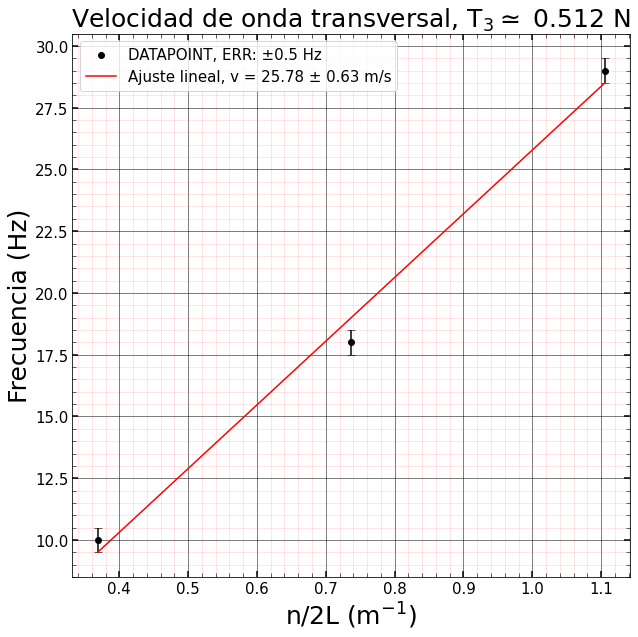

In [79]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(datos_transversal_t3['n'] / (2 * largo_cuerda), datos_transversal_t3['frecuencia (KHz)'] * 1000, c='black', label='DATAPOINT, ERR: ±{} Hz'.format(datos_transversal_t3['err_frec'][0] * 1000))
ax.errorbar(datos_transversal_t3['n'] / (2 * largo_cuerda), datos_transversal_t3['frecuencia (KHz)'] * 1000, yerr = datos_transversal_t3['err_frec'] * 1000, fmt = '.', markersize = '1', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6 )
ax.plot(datos_transversal_t3['n'] / (2 * largo_cuerda), velocidad_onda(datos_transversal_t3['n'] / (2 * largo_cuerda), popt_vt3[0]), c='red', label='Ajuste lineal, v = {} ± {} m/s'.format(round(popt_vt3[0], 2), round(np.sqrt(pcov_vt3[0][0]), 2)))

ax.set_title(r'Velocidad de onda transversal, T$_3 \simeq$ {} N'.format(round(lista_tensiones[2], 3)), fontsize=25)
ax.set_ylabel(r'Frecuencia (Hz)', fontsize=25)
ax.set_xlabel(r'n/2L (m$^{-1}$)', fontsize=25)

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
              grid_linewidth=0.5)

ax.xaxis.set_minor_locator(MultipleLocator(0.02))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')
ax.grid(True, which='both')
ax.legend(fontsize=15)

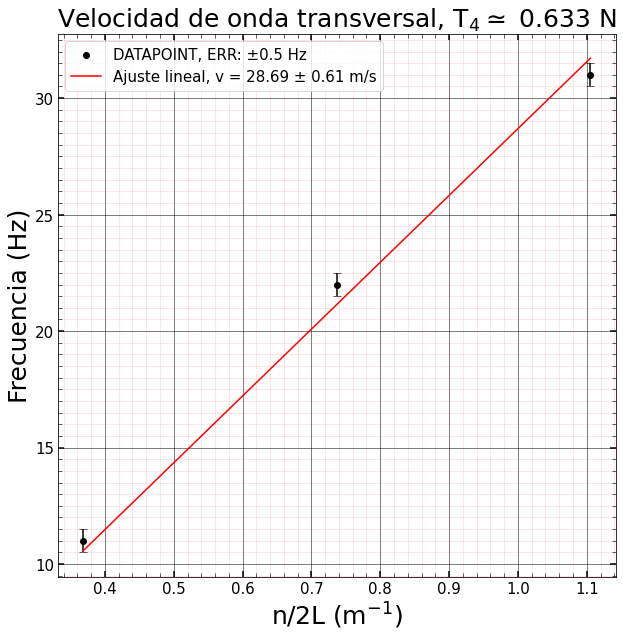

In [80]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(datos_transversal_t4['n'] / (2 * largo_cuerda), datos_transversal_t4['frecuencia (KHz)'] * 1000, c='black', label='DATAPOINT, ERR: ±{} Hz'.format(datos_transversal_t4['err_frec'][0] * 1000))
ax.errorbar(datos_transversal_t4['n'] / (2 * largo_cuerda), datos_transversal_t4['frecuencia (KHz)'] * 1000, yerr = datos_transversal_t4['err_frec'] * 1000, fmt = '.', markersize = '1', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6 )
ax.plot(datos_transversal_t4['n'] / (2 * largo_cuerda), velocidad_onda(datos_transversal_t4['n'] / (2 * largo_cuerda), popt_vt4[0]), c='red', label='Ajuste lineal, v = {} ± {} m/s'.format(round(popt_vt4[0], 2), round(np.sqrt(pcov_vt4[0][0]), 2)))

ax.set_title(r'Velocidad de onda transversal, T$_4 \simeq$ {} N'.format(round(lista_tensiones[3], 3)), fontsize=25)
ax.set_ylabel(r'Frecuencia (Hz)', fontsize=25)
ax.set_xlabel(r'n/2L (m$^{-1}$)', fontsize=25)

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
              grid_linewidth=0.5)

ax.xaxis.set_minor_locator(MultipleLocator(0.02))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')
ax.grid(True, which='both')
ax.legend(fontsize=15)

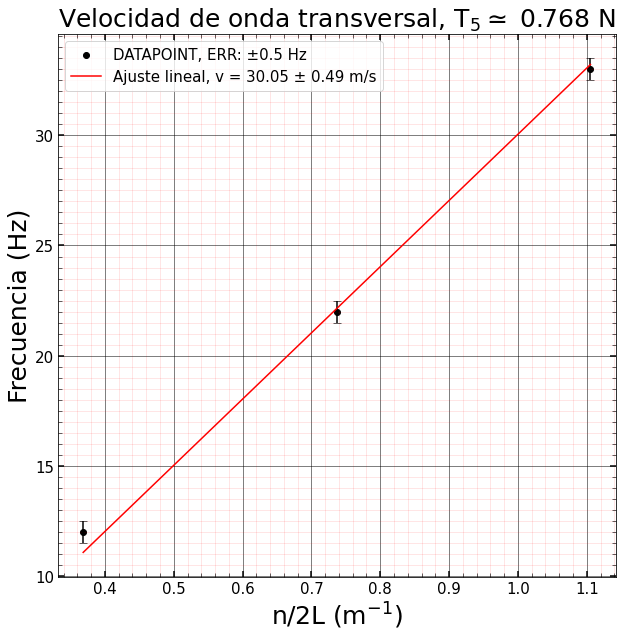

In [81]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(datos_transversal_t5['n'] / (2 * largo_cuerda), datos_transversal_t5['frecuencia (KHz)'] * 1000, c='black', label='DATAPOINT, ERR: ±{} Hz'.format(datos_transversal_t5['err_frec'][0] * 1000))
ax.errorbar(datos_transversal_t5['n'] / (2 * largo_cuerda), datos_transversal_t5['frecuencia (KHz)'] * 1000, yerr = datos_transversal_t5['err_frec'] * 1000, fmt = '.', markersize = '1', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6 )
ax.plot(datos_transversal_t5['n'] / (2 * largo_cuerda), velocidad_onda(datos_transversal_t5['n'] / (2 * largo_cuerda), popt_vt5[0]), c='red', label='Ajuste lineal, v = {} ± {} m/s'.format(round(popt_vt5[0], 2), round(np.sqrt(pcov_vt5[0][0]), 2)))

ax.set_title(r'Velocidad de onda transversal, T$_5 \simeq$ {} N'.format(round(lista_tensiones[4], 3)), fontsize=25)
ax.set_ylabel(r'Frecuencia (Hz)', fontsize=25)
ax.set_xlabel(r'n/2L (m$^{-1}$)', fontsize=25)

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
              grid_linewidth=0.5)

ax.xaxis.set_minor_locator(MultipleLocator(0.02))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')
ax.grid(True, which='both')
ax.legend(fontsize=15)

In [42]:
datos_vt = pd.DataFrame()
datos_vt['Tension (N)'] = lista_tensiones
datos_vt['Velocidad (m/s)'] = [popt_vt1[0], popt_vt2[0], popt_vt3[0], popt_vt4[0], popt_vt5[0]]
datos_vt['err_vel'] = [np.sqrt(np.diag(pcov_vt1))[0], np.sqrt(np.diag(pcov_vt2))[0], np.sqrt(np.diag(pcov_vt3))[0], np.sqrt(np.diag(pcov_vt4))[0], np.sqrt(np.diag(pcov_vt5))[0]]

datos_vt

,Tension (N),Velocidad (m/s),err_vel
0,0.277332,20.161143,0.335770
1,0.396777,22.875143,0.613030
2,0.511907,25.783000,0.628169
3,0.633117,28.690857,0.613030
4,0.767566,30.047857,0.494241


In [43]:
pearson_vt = pearsonr(datos_vt['Tension (N)'], datos_vt['Velocidad (m/s)'] ** 2)

$$v^{2} = T\frac{1}{\mu}$$

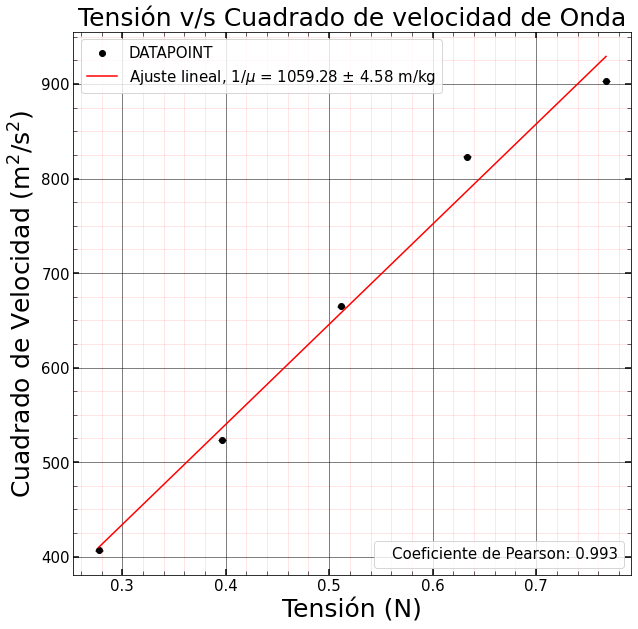

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(datos_vt['Tension (N)'], datos_vt['Velocidad (m/s)'] ** 2, c='black', label='DATAPOINT')
ax.errorbar(datos_vt['Tension (N)'], datos_vt['Velocidad (m/s)'] ** 2, yerr = datos_vt['err_vel'] ** 2, fmt = '.', markersize = '1', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6 )
ax.plot(datos_vt['Tension (N)'], np.polyval(polyfit_vt, datos_vt['Tension (N)']), c='red',
        label=r'Ajuste lineal, 1/$\mu$ = {} ± {} m/kg'.format(np.round(polyfit_vt[0], 2), np.round(np.sqrt(np.diag(np.polyfit(datos_vt['Tension (N)'], datos_vt['Velocidad (m/s)'], 1)))[0][0], 2)))

ax.set_title(r'Tensión v/s Cuadrado de velocidad de Onda', fontsize=25)
ax.set_ylabel(r'Cuadrado de Velocidad (m$^2$/s$^2$)', fontsize=25)
ax.set_xlabel(r'Tensión (N)', fontsize=25)

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
              grid_linewidth=0.5)

extra_legend_1 = mpatches.Patch(label=r'Coeficiente de Pearson: {}'.format(round(pearson_vt[0], 3)), alpha=0)
handles, labels = ax.get_legend_handles_labels()
handles.append(extra_legend_1)
extra_legend = ax.legend(handles=[extra_legend_1], loc='lower right', bbox_to_anchor=(1.0, 0.0), fontsize=15, markerscale=0, handlelength=0)
extra_legend.legendHandles[0].set_visible(False)
ax.add_artist(extra_legend)

ax.xaxis.set_minor_locator(MultipleLocator(0.02))
ax.yaxis.set_minor_locator(MultipleLocator(25))
ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')
ax.grid(True, which='both')
ax.legend(fontsize=15)
ax.legend(handles=handles, labels=labels, fontsize=15)

In [45]:
polyfit_vt = np.polyfit(datos_vt['Tension (N)'], datos_vt['Velocidad (m/s)'] ** 2, 1)
polyfit_vt

array([1059.28399785,  116.0991884 ])

# Parte 3

$$(m_f - m_i)g = k\Delta x $$

$$k = \frac{(m_f - m_i)g}{\Delta x}$$

In [59]:
# calcular constante del resorte

masa_inicial = 13.11 * u.g # g
masa_final = 25.01 * u.g # g
desplazamiento = 7 * u.cm # cm

k_resorte = ((masa_final.si - masa_inicial.si) * const.g0) / desplazamiento.si
k_resorte.to(u.Newton / u.m)

err_k_resorte = np.sqrt((((- masa_final.si + masa_inicial.si) * const.g0 * err_largo.si) / (desplazamiento.si ** 2)) ** 2 + 2 * ((const.g0 * err_balanza.si) / desplazamiento.si) ** 2)

print(r'{} ± {}'.format(k_resorte.to(u.Newton / u.m), err_k_resorte.to(u.Newton / u.m)))

1.6671304999999998 N / m ± 0.011949208369464271 N / m


In [73]:
# Tensiones

largo_t1 = 56 * u.cm # cm
largo_t2 = 40.2 * u.cm # cm
largo_t3 = 28 * u.cm # cm

resorte_t1 = (largo_t1.si * k_resorte).to(u.Newton)
resorte_t2 = (largo_t2.si * k_resorte).to(u.Newton)
resorte_t3 = (largo_t3.si * k_resorte).to(u.Newton)

err_resorte_t1 = np.sqrt((err_largo.si * k_resorte) ** 2 + (err_k_resorte * (56 * u.cm).si) ** 2).to(u.Newton)
err_resorte_t2 = np.sqrt((err_largo.si * k_resorte) ** 2 + (err_k_resorte * (40.2 * u.cm).si) ** 2).to(u.Newton)
err_resorte_t3 = np.sqrt((err_largo.si * k_resorte) ** 2 + (err_k_resorte * (28 * u.cm).si) ** 2).to(u.Newton)

In [75]:
datos_longitudinal_t1 = pd.DataFrame()
datos_longitudinal_t1['n'] = [5, 8, 11, 16, 20]
datos_longitudinal_t1['frecuencia (KHz)'] = [0.020, 0.030, 0.040, 0.060, 0.075]
datos_longitudinal_t1['err_frec'] = [err_frecuencia for i in range(5)]

datos_longitudinal_t2 = pd.DataFrame()
datos_longitudinal_t2['n'] = [6, 8, 11, 16, 19, 21]
datos_longitudinal_t2['frecuencia (KHz)'] = [0.027, 0.032, 0.041, 0.060, 0.070, 0.080]
datos_longitudinal_t2['err_frec'] = [err_frecuencia for i in range(6)]

datos_longitudinal_t3 = pd.DataFrame()
datos_longitudinal_t3['n'] = [6, 8, 12, 16]
datos_longitudinal_t3['frecuencia (KHz)'] = [0.026, 0.037, 0.060, 0.075]
datos_longitudinal_t3['err_frec'] = [err_frecuencia for i in range(4)]

In [76]:
popt_vt1_long, pcov_vt1_long = curve_fit(velocidad_onda, datos_longitudinal_t1['n'] / (2 * largo_t1), datos_longitudinal_t1['frecuencia (KHz)'] * 1000, sigma=datos_longitudinal_t1['err_frec'] * 1000)

popt_vt2_long, pcov_vt2_long = curve_fit(velocidad_onda, datos_longitudinal_t2['n'] / (2 * largo_t2), datos_longitudinal_t2['frecuencia (KHz)'] * 1000, sigma=datos_longitudinal_t2['err_frec'] * 1000)

popt_vt3_long, pcov_vt3_long = curve_fit(velocidad_onda, datos_longitudinal_t3['n'] / (2 * largo_t3), datos_longitudinal_t3['frecuencia (KHz)'] * 1000, sigma=datos_longitudinal_t3['err_frec'] * 1000)

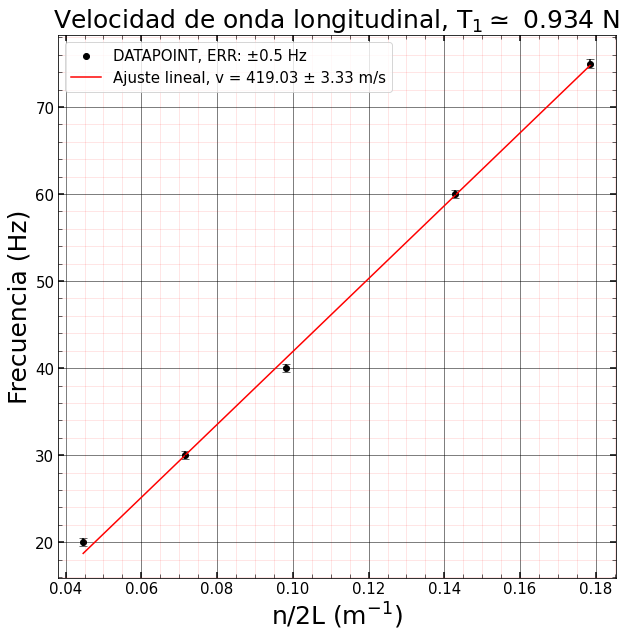

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(datos_longitudinal_t1['n'] / (2 * largo_t1), datos_longitudinal_t1['frecuencia (KHz)'] * 1000, c='black', label='DATAPOINT, ERR: ±{} Hz'.format(datos_longitudinal_t1['err_frec'][0] * 1000))
ax.errorbar(datos_longitudinal_t1['n'] / (2 * largo_t1), datos_longitudinal_t1['frecuencia (KHz)'] * 1000, yerr = datos_longitudinal_t1['err_frec'] * 1000, fmt = '.', markersize = '1', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6 )
ax.plot(datos_longitudinal_t1['n'] / (2 * largo_t1), velocidad_onda(datos_longitudinal_t1['n'] / (2 * largo_t1), popt_vt1_long[0]), c='red', label='Ajuste lineal, v = {} ± {} m/s'.format(round(popt_vt1_long[0], 2), round(np.sqrt(pcov_vt1_long[0][0]), 2)))

ax.set_title(r'Velocidad de onda longitudinal, T$_1 \simeq$ {} N'.format(round(resorte_t1.value, 3)), fontsize=25)
ax.set_ylabel(r'Frecuencia (Hz)', fontsize=25)
ax.set_xlabel(r'n/2L (m$^{-1}$)', fontsize=25)

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
              grid_linewidth=0.5)

ax.xaxis.set_minor_locator(MultipleLocator(0.005))
ax.yaxis.set_minor_locator(MultipleLocator(2))
ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')
ax.grid(True, which='both')
ax.legend(fontsize=15)

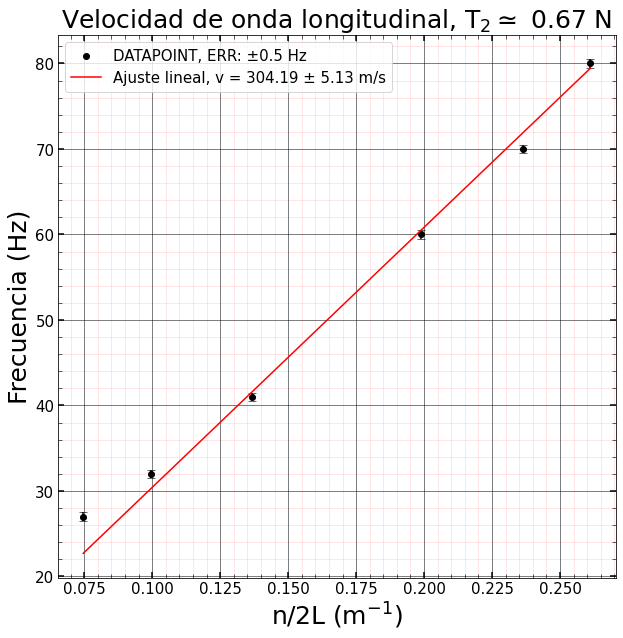

In [92]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(datos_longitudinal_t2['n'] / (2 * largo_t2), datos_longitudinal_t2['frecuencia (KHz)'] * 1000, c='black', label='DATAPOINT, ERR: ±{} Hz'.format(datos_longitudinal_t2['err_frec'][0] * 1000))
ax.errorbar(datos_longitudinal_t2['n'] / (2 * largo_t2), datos_longitudinal_t2['frecuencia (KHz)'] * 1000, yerr = datos_longitudinal_t2['err_frec'] * 1000, fmt = '.', markersize = '1', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6 )
ax.plot(datos_longitudinal_t2['n'] / (2 * largo_t2), velocidad_onda(datos_longitudinal_t2['n'] / (2 * largo_t2), popt_vt2_long[0]), c='red', label='Ajuste lineal, v = {} ± {} m/s'.format(round(popt_vt2_long[0], 2), round(np.sqrt(pcov_vt2_long[0][0]), 2)))

ax.set_title(r'Velocidad de onda longitudinal, T$_2 \simeq$ {} N'.format(round(resorte_t2.value, 3)), fontsize=25)
ax.set_ylabel(r'Frecuencia (Hz)', fontsize=25)
ax.set_xlabel(r'n/2L (m$^{-1}$)', fontsize=25)

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
              grid_linewidth=0.5)

ax.xaxis.set_minor_locator(MultipleLocator(0.005))
ax.yaxis.set_minor_locator(MultipleLocator(2))
ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')
ax.grid(True, which='both')
ax.legend(fontsize=15)

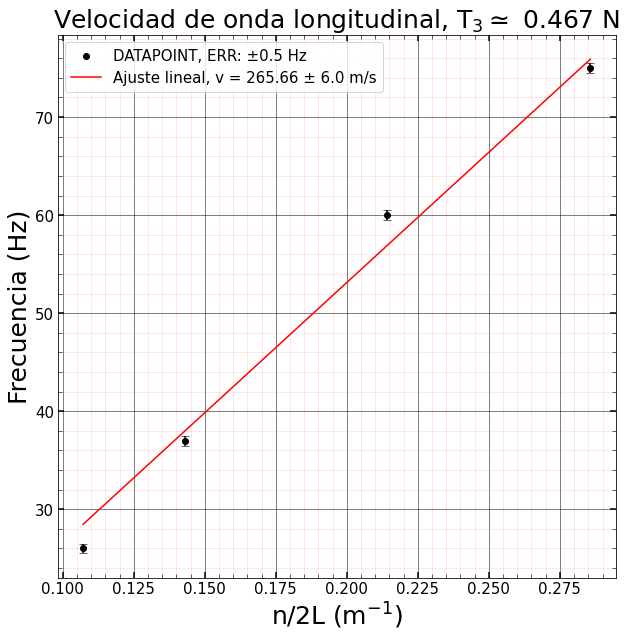

In [93]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(datos_longitudinal_t3['n'] / (2 * largo_t3), datos_longitudinal_t3['frecuencia (KHz)'] * 1000, c='black', label='DATAPOINT, ERR: ±{} Hz'.format(datos_longitudinal_t3['err_frec'][0] * 1000))
ax.errorbar(datos_longitudinal_t3['n'] / (2 * largo_t3), datos_longitudinal_t3['frecuencia (KHz)'] * 1000, yerr = datos_longitudinal_t3['err_frec'] * 1000, fmt = '.', markersize = '1', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6 )
ax.plot(datos_longitudinal_t3['n'] / (2 * largo_t3), velocidad_onda(datos_longitudinal_t3['n'] / (2 * largo_t3), popt_vt3_long[0]), c='red', label='Ajuste lineal, v = {} ± {} m/s'.format(round(popt_vt3_long[0], 2), round(np.sqrt(pcov_vt3_long[0][0]), 2)))

ax.set_title(r'Velocidad de onda longitudinal, T$_3 \simeq$ {} N'.format(round(resorte_t3.value, 3)), fontsize=25)
ax.set_ylabel(r'Frecuencia (Hz)', fontsize=25)
ax.set_xlabel(r'n/2L (m$^{-1}$)', fontsize=25)

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
              grid_linewidth=0.5)

ax.xaxis.set_minor_locator(MultipleLocator(0.005))
ax.yaxis.set_minor_locator(MultipleLocator(2))
ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')
ax.grid(True, which='both')
ax.legend(fontsize=15)

In [101]:
datos_vt_long = pd.DataFrame()
datos_vt_long['Tension (N)'] = [resorte_t1.value, resorte_t2.value, resorte_t3.value]
datos_vt_long['Velocidad (m/s)'] = [popt_vt1_long[0], popt_vt2_long[0], popt_vt3_long[0]]
datos_vt_long['err_vel'] = [np.sqrt(np.diag(pcov_vt1_long))[0], np.sqrt(np.diag(pcov_vt2_long))[0], np.sqrt(np.diag(pcov_vt3_long))[0]]

datos_vt_long

,Tension (N),Velocidad (m/s),err_vel
0,0.933593,419.030023,3.328841
1,0.670186,304.187334,5.127365
2,0.466797,265.664000,6.002197


In [99]:
def vel_linear_fit(x, a, b):
    return a * x + b

In [110]:
pearson_vt_long = pearsonr(datos_vt_long['Tension (N)'], datos_vt_long['Velocidad (m/s)'] ** 2)

In [104]:
fit_vt_long, pcov_vt_long = curve_fit(vel_linear_fit, datos_vt_long['Tension (N)'], datos_vt_long['Velocidad (m/s)'] ** 2, sigma=datos_vt_long['err_vel'] ** 2)
fit_vt_long

array([255650.49268894, -64216.55123133])

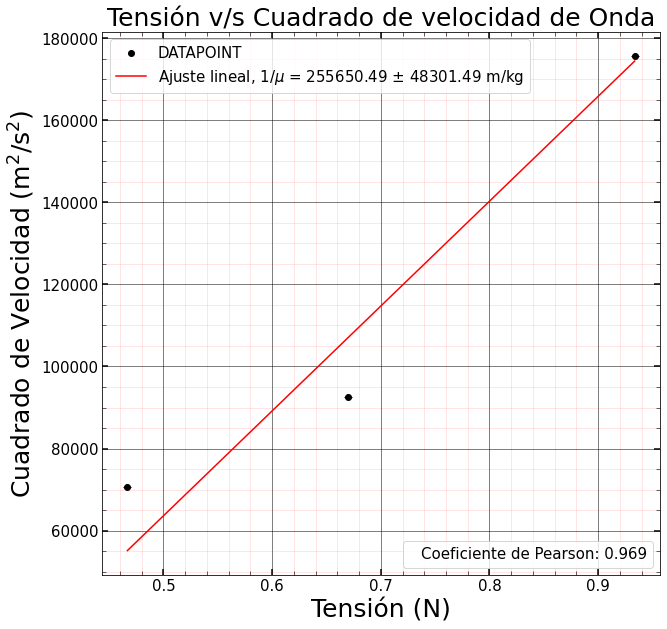

In [111]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(datos_vt_long['Tension (N)'], datos_vt_long['Velocidad (m/s)'] ** 2, c='black', label='DATAPOINT')
ax.errorbar(datos_vt_long['Tension (N)'], datos_vt_long['Velocidad (m/s)'] ** 2, yerr = datos_vt_long['err_vel'] ** 2, fmt = '.', markersize = '1', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6 )
ax.plot(datos_vt_long['Tension (N)'], np.polyval(fit_vt_long, datos_vt_long['Tension (N)']), c='red',
        label=r'Ajuste lineal, 1/$\mu$ = {} ± {} m/kg'.format(np.round(fit_vt_long[0], 2), np.round(np.sqrt(np.diag(pcov_vt_long))[0], 2)))

ax.set_title(r'Tensión v/s Cuadrado de velocidad de Onda', fontsize=25)
ax.set_ylabel(r'Cuadrado de Velocidad (m$^2$/s$^2$)', fontsize=25)
ax.set_xlabel(r'Tensión (N)', fontsize=25)

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
              grid_linewidth=0.5)

extra_legend_1 = mpatches.Patch(label=r'Coeficiente de Pearson: {}'.format(round(pearson_vt_long[0], 3)), alpha=0)
handles, labels = ax.get_legend_handles_labels()
handles.append(extra_legend_1)
extra_legend = ax.legend(handles=[extra_legend_1], loc='lower right', bbox_to_anchor=(1.0, 0.0), fontsize=15, markerscale=0, handlelength=0)
extra_legend.legendHandles[0].set_visible(False)
ax.add_artist(extra_legend)

ax.xaxis.set_minor_locator(MultipleLocator(0.02))
ax.yaxis.set_minor_locator(MultipleLocator(5000))
ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')
ax.grid(True, which='both')
ax.legend(fontsize=15)
ax.legend(handles=handles, labels=labels, fontsize=15)